In [7]:
import pandas as pd
import numpy as np

## Description of the dataset

In [8]:
hd = pd.read_csv('framingham.csv')
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## First 10 values from the dataset

In [9]:
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Total samples and attributes in the dataset

In [10]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


## Information about missing data
### Column-wise count of missing values and count of rows with values missing

In [11]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


## Distribution of data based on the label

In [12]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


In [13]:
import matplotlib.pyplot as plt
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

<Figure size 640x480 with 1 Axes>

## Dropping rows with missing values

In [14]:
hd.drop(['education'], axis = 1, inplace = True)
hd.dropna(axis = 0, inplace = True)
hd.shape

(3751, 15)

## Using Random Forest to determine feature importance

In [15]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(random_state = 1, n_estimators = 1000, n_jobs = -1)
x = hd.iloc[:, :-1]
y = hd.iloc[:, -1]
rfr.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

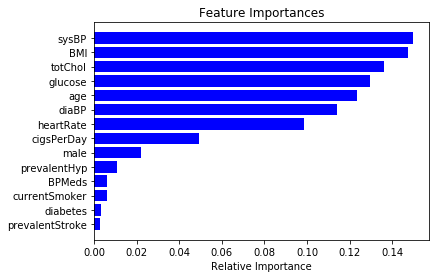

In [16]:
features = hd.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Verifying the results of the Random Forest Classifier
### The first Logistic Regression model is trained on all features, the second one is trained on the most important features. We binarize the output to tackle the class imbalance.

In [26]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(C = 0.01, fit_intercept = True, random_state = 0, max_iter = 10000, penalty = 'l2', solver = 'lbfgs')
x1 = hd[['age', 'sysBP', 'male', 'cigsPerDay', 'totChol', 'diaBP', 'BMI']]
x2 = x
y = y = hd.iloc[:, -1]

### All features

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = .20)
lr.fit(x_train, y_train)
y1 = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y1))
conf_matrix

Accuracy: 0.8455392809587217


,Predicted: 0,Predicted: 1
Actual:0,628,7
Actual:1,109,7


In [42]:
yprob = lr.predict_proba(x_test)
yprob[10:20]

array([[0.60968872, 0.39031128],
       [0.82630069, 0.17369931],
       [0.76650599, 0.23349401],
       [0.91148635, 0.08851365],
       [0.63432983, 0.36567017],
       [0.87218124, 0.12781876],
       [0.62052888, 0.37947112],
       [0.80012482, 0.19987518],
       [0.78457505, 0.21542495],
       [0.62314083, 0.37685917]])

In [43]:
from sklearn.preprocessing import binarize
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred)*100)
conf_matrix

Accuracy: 65.9121171770972


,Predicted: 0,Predicted: 1
Actual:0,427,208
Actual:1,48,68


### Selected features

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = .20)
lr.fit(x_train, y_train)
y1 = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y1)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y1)*100)
conf_matrix

Accuracy: 83.48868175765645


,Predicted: 0,Predicted: 1
Actual:0,618,4
Actual:1,120,9


In [45]:
yprob = lr.predict_proba(x_test)
yprob[10:20]

array([[0.87564278, 0.12435722],
       [0.96545629, 0.03454371],
       [0.768508  , 0.231492  ],
       [0.88563607, 0.11436393],
       [0.91424539, 0.08575461],
       [0.90212775, 0.09787225],
       [0.9646953 , 0.0353047 ],
       [0.55930899, 0.44069101],
       [0.66257722, 0.33742278],
       [0.89343824, 0.10656176]])

In [46]:
from sklearn.preprocessing import binarize
ypred = binarize(yprob, 0.15)[:, 1]
cm = confusion_matrix(y_test, ypred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, ypred)*100)
conf_matrix

Accuracy: 67.37683089214381


,Predicted: 0,Predicted: 1
Actual:0,418,204
Actual:1,41,88
